In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Added all Libraries
from spectral import *
import numpy as np
import PIL
import matplotlib
import matplotlib.pyplot as plt
import mpmath as mp

In [3]:
#image stored in arr
img = open_image('f090819t01p00r06rdn_b_sc01_ort_img.hdr')
print img
arr = img.load()
block = []
for i in range(224):
    data = arr[2500:2510,450:460,i].astype(np.float32)
    block.append(data)
print "process complete"
varblock = []
for hg in range(224):
    yog = np.var(block[hg])
    varblock.append(yog)
variance = np.average(varblock)
##### considering 40x40 matrix
block = []
for i in range(224):
    data = arr[2500:2540,450:490,i].astype(np.float32)
    block.append(data)
print "process complete"

	Data Source:   '././f090819t01p00r06rdn_b_sc01_ort_img'
	# Rows:           6955
	# Samples:         781
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16
process complete
process complete


In [4]:
#correlation
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


In [5]:
#Pre-Processing of the hyperspectral image, Hawaii. Using GOA technique
haha = corr.index(min(corr))
print haha

157


In [6]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [7]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


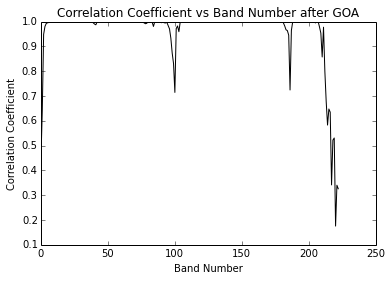

In [8]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [9]:
#normalizing each block
rblockn = []
maxblock = []
minblock = []
for q in range(len(rblock)):
    xc = rblock[q]
    maxxc = np.max(xc)
    maxblock.append(maxxc)
    minxc = np.min(xc)
    minblock.append(minxc)
    xcfin = []
    for xci in range(len(xc)):
        for xcj in range(len(xc)):
            xcres = (xc[xci][xcj] - minxc)/(maxxc - minxc) 
            xcfin.append(xcres)
    xcfin1 = np.reshape(xcfin,(40,-1))
    rblockn.append(xcfin1)
print 'Process Complete'

Process Complete


In [10]:
def raster(arr):
    a = arr
    xx = []
    for i in range(10):
        zz = []
        for j in range(10):
            x = float(a[i][j])
            zz.append(x)
        xx.extend(zz)
        del zz
    return xx

In [11]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:10,:10]
    yy = raster(xx)
    finlist = finlist + yy

In [12]:
len(finlist)

22400

In [13]:
finlist = list(finlist)

In [14]:
float(finlist[0])

0.5555555820465088

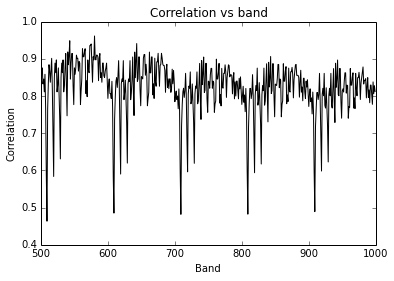

In [15]:
plt.figure(29)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [16]:
from audiolazy import lpc

In [17]:
y = 10 #frame size

In [18]:
finli = map (lambda x: finlist[y*x:(x+1)*y], range (len(finlist)/y)) 

In [19]:
reslpcfin = []
errorframe = []
coefficient = []
lpcfunction = []
lpcerror = []
errorfull = []
for ijk in range(len(finlist)/y):
    lpcframe = lpc(finli[ijk],order=3)
    lpcfunction.append(lpcframe)
    lpcerror.append(lpcframe.error)
    reslpc = list(lpcframe(finli[ijk]))
    reslpcfin.append(reslpc)
    coefficient.append(lpcframe.numerator)
    errorfr = []
    for ijkl in range(len(reslpc)):
        err = finli[ijk][ijkl] - reslpc[ijkl]
        errorfr.append(err)
        errorfull.append(err)
    errorframe.append(errorfr)
    del(errorfr)
    del(reslpc)
    del(lpcframe)
print "process complete"

process complete


In [20]:
from __future__ import with_statement
from __future__ import unicode_literals

import numpy as np
import scipy.cluster
from pylab import *

class codebook(object):

    def __init__(self, input):
        self.__vector = []
        for i in input:
            self.vector.append(np.array(i))
        self.__centroid = 0.0

    def __str__(self):
        return "centroid:" + str(self.__centroid) + " vector_count:" + str(len(self.__vector))

    #The center of the calculation
    @property
    def centroid(self):
        return self.__centroid

    def _get_vector(self):
        return self.__vector

    def _set_vector(self, value):
        self.__vector.append(value)

    def _del_vector(self):
        self.__vector = []

    vector = property(_get_vector, _set_vector, _del_vector)

    def calc_centroid(self, eps = 0.0):
        if len(self.__vector) < 1:
            return False

        c = np.zeros([len(self.__vector[0])])
        for i in self.__vector:
            c += i
        self.__centroid = (c / len(self.__vector))* (1.0 + eps)

        return True



class LBG_splitting(object):
    """LBG+Splitting Algorithm"""

    #Calculation of distortion ( metrics / convergence determination)
    def calc_D(self):
        result = 0.0
        a = []
        for code in self.__codebook:
            center = code.centroid
            for child in code.vector:
                result += np.linalg.norm(center - child)
                a.append(np.linalg.norm(center - child))
        return result , a

    def start(self, N, input1, eps = np.float64(0.00001)):
        delta = np.float64(0.01)
        eps = np.float64(eps)
        #Creating the initial code book / initialization
        self.__codebook = []
        N /= 2
        d = int(len(input1)/N)
        for i in range(N):
            tmp = input1[i*d:(i+1)*d]


            #You want to create a minute of the code book of + delta and -delta
            code = codebook(tmp)
            code.calc_centroid(delta)
            self.__codebook.append(code)

            code = codebook(tmp)
            code.calc_centroid(-1*delta)
            self.__codebook.append(code)

            
        #Strain calculation
        global D
        distort = self.calc_D()
        D = distort[0]
        global distortion
        distortion = []
        distortion.append(distort[1])
        cnt = 0
        
        print "distortion = ", D
        
        #Clustering
        while True:
            #For now , delete the previous results
            for i in self.__codebook:
                del(i.vector)

            #Clustering part
            global position
            position = []
            for vector in input1:
                d = np.finfo(np.float64).max
                pos = -1
                for i in range(len(self.__codebook)):
                    code = self.__codebook[i]
                    tmp = np.linalg.norm(vector - code.centroid)
                    if d >= tmp:
                        d = tmp
                        pos = i
                position.append(pos)
                self.__codebook[pos].vector = vector

            #Recalculation of the median
            temp_codebook = []
            for i in self.__codebook:
                if i.calc_centroid():
                    temp_codebook.append(i)

            self.__codebook = temp_codebook


            #Calculation of metrics
            distort = self.calc_D()
            tmp_D = distort[0]
            distortion.append(distort[1])
            
            if (D - tmp_D) / D <= eps:
                break

            D = tmp_D
            print "distortion = ", D

    @property
    def codebook(self):
        return self.__codebook

In [21]:
N = 256    #The number of Clusters
data = np.array(errorframe)       #Input Data

clustering = LBG_splitting()

clustering.start(N, data)

distortion =  516.785482264
distortion =  140.556721298
distortion =  113.610362517
distortion =  106.596402342
distortion =  102.242975687
distortion =  99.0222160919
distortion =  97.6526413708
distortion =  97.0217958765
distortion =  96.8489641445
distortion =  96.8318957222
distortion =  96.2643182699
distortion =  96.0641059762
distortion =  95.923762965
distortion =  95.8985427579
distortion =  95.8809428355
distortion =  95.8183450406
distortion =  95.7750939122
distortion =  95.7346511985
distortion =  95.7045439538


In [22]:
np.sum(distortion[0])
dist = D

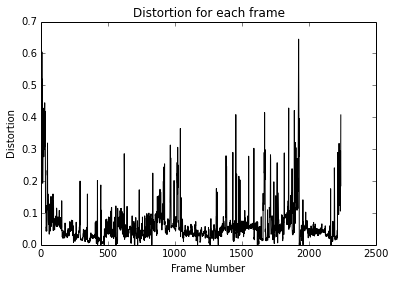

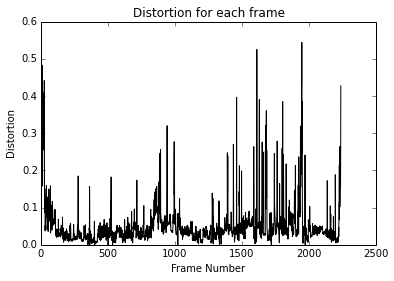

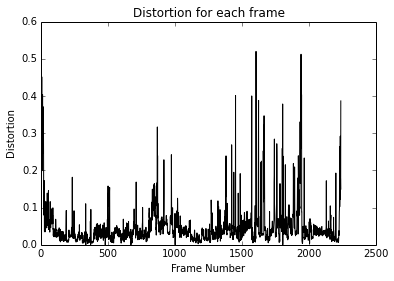

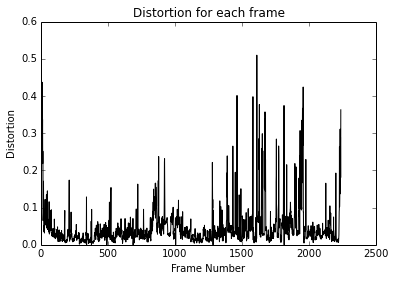

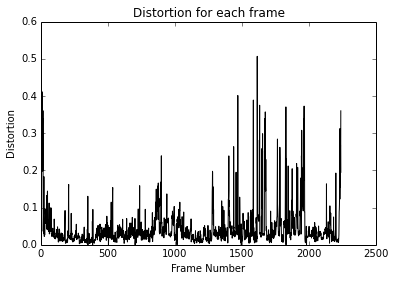

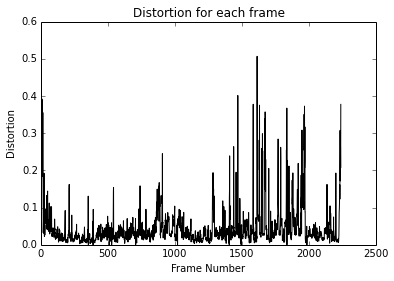

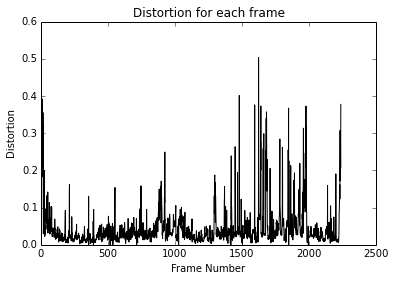

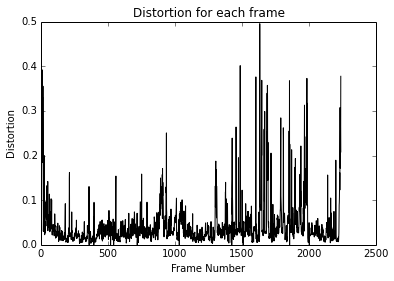

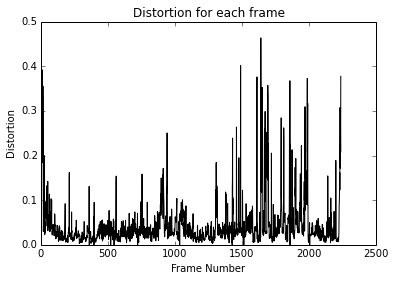

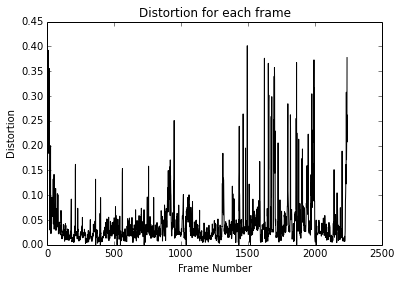

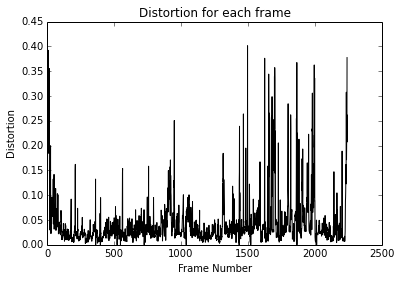

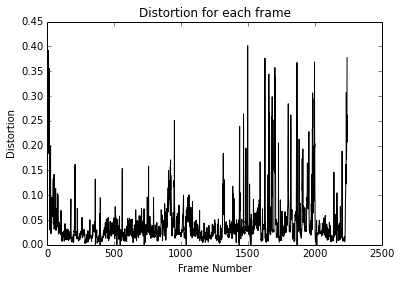

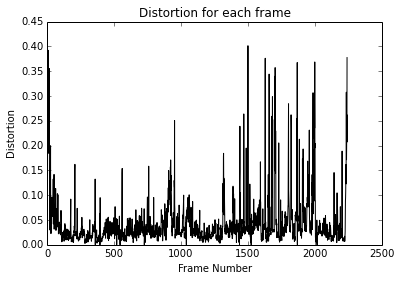

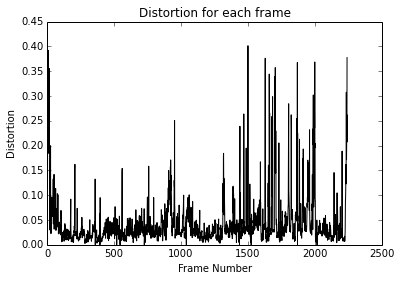

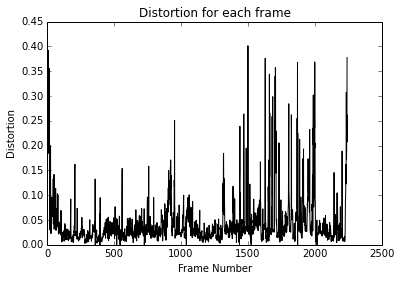

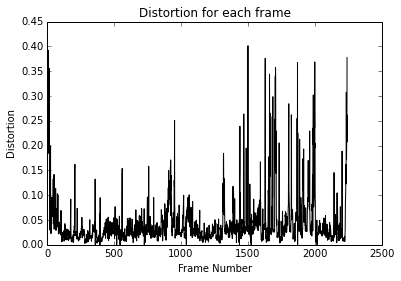

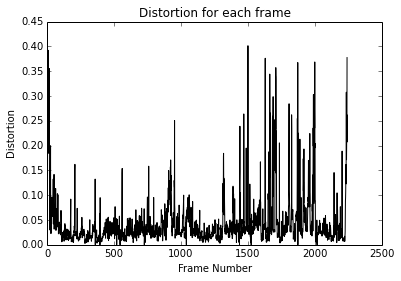

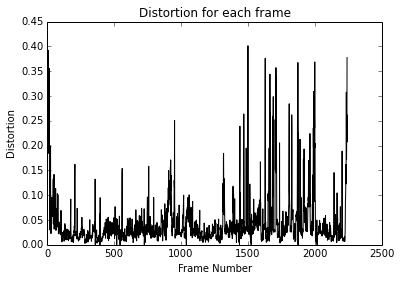

In [23]:
#plot of distortion

for i in range(1,len(distortion)-1):
    plt.figure(12+i)
    plt.plot(range(len(finlist)/y),distortion[i], 'k')
    plt.xlabel('Frame Number')
    plt.ylabel('Distortion')
    plt.title('Distortion for each frame')
    plt.show()

In [24]:
for i in range(len(clustering.codebook)):
    codebook = clustering.codebook[i]
    print "Cluster%d" % (i)
    print "\tcentroid:%s" % (codebook.centroid)
    print "\tvectors:"
    for j in codebook.vector:
        print "\t\t%s" % (j)

Cluster0
	centroid:[ 0.          0.53290234  0.80191042  0.78273814  0.66124681  0.43242291
  0.46263053  0.45190734  0.52022343  0.44927484]
	vectors:
		[ 0.          0.55107298  0.8670153   0.80052036  0.8761305   0.32211726
  0.43549849  0.60044687  0.58597176  0.46422236]
		[ 0.          0.50064969  0.72070427  0.74403597  0.51384858  0.48898746
  0.52287392  0.42274396  0.61904488  0.5437761 ]
		[ 0.          0.54158994  0.84117187  0.7763208   0.62847314  0.46276184
  0.32598175  0.36471483  0.52353386  0.22094622]
		[ 0.          0.58626262  0.90098565  0.92548431  0.69165825  0.57274925
  0.59715318  0.51344406  0.50984543  0.42613625]
		[ 0.          0.53761068  0.72772131  0.88838879  0.55942126  0.42997067
  0.51323023  0.42362843  0.49647874  0.53404512]
		[ 0.          0.48022813  0.75386408  0.56167862  0.69794913  0.31795101
  0.3810456   0.38646591  0.38646591  0.50652296]
Cluster1
	centroid:[ 0.          0.33023361  0.39741185  0.43691996  0.4295252   0.27050154
  0.33

In [25]:
a = 0
for i in range(len(clustering.codebook)):
    a = len(clustering.codebook[i].vector) + a
print a

2240


In [26]:
len(position)

2240

In [27]:
clustering.codebook[position[2]].centroid

array([ 0.        ,  0.4192788 ,  0.63357127,  0.48351785,  0.52087595,
        0.4925072 ,  0.47664034,  0.57527982,  0.57031197,  0.34339155])

In [28]:
errorframe[2]

[0.0,
 0.4345782116506363,
 0.6617237287934482,
 0.38041963895337827,
 0.5461279695900134,
 0.4701922609560928,
 0.4874961222315144,
 0.7482430212467871,
 0.46733529527106005,
 0.45249203581632835]

In [29]:
huffcodebook = position

In [30]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
txt = "this is an example for huffman encoding"
symb2freq = defaultdict(int)
for ch in huffcodebook:
    symb2freq[ch] += 1
# in Python 3.1+:
# symb2freq = collections.Counter(txt)
huff = encode(symb2freq)
print "Symbol\tWeight\tHuffman Code"
huffsymbol = []
hufffreq = []
for p in huff:
    huffsymbol.append(p[1])
    hufffreq.append(symb2freq[p[0]])
    #print "%s\t%s\t%s" % (p[0], symb2freq[p[0]], p[1])

Symbol	Weight	Huffman Code


In [31]:
lenhuff = []
for i in range(len(huffsymbol)):
    yo = huffsymbol[i]
    x = str(yo)
    ya = x.lstrip('0')
    lenhuff.append(len(ya)*hufffreq[i])
print sum(lenhuff)

14177


In [32]:
cr = float(len(finlist)*16)/sum(lenhuff)
print cr

25.2803837201


In [33]:
#BPP
bpp = sum(lenhuff)/22400.00
print bpp

0.632901785714


In [34]:
sum(lenhuff)

14177

In [35]:
#huffcodebook - vector de-quantization
errordecode = []
for ik in position:
    abcde = list(clustering.codebook[ik].centroid)
    errordecode.append(abcde)

In [36]:
len(errordecode)

2240

In [37]:
print coefficient[0]
print "---"
print lpcerror[0]
print "---"
print lpcfunction[0] #h
print "---"
print finli[0] #x
print "---"
print reslpcfin[0] #y
print "---"
print errordecode[0] #e

[1, -0.9919313231500277, 0.02646257884276082, 0.10381334920150698]
---
0.997774630387
---
1 - 0.991931 * z^-1 + 0.0264626 * z^-2 + 0.103813 * z^-3
---
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088]
---
[0.5555555820465088, 0.3378159119288654, 0.021873590644900166, 0.19947963986189002, -0.4316860496026919, 0.23343832507174223, 0.23116819839410271, 0.06621981810753792, -0.030416181033650465, 0.09133321974863047]
---
[0.0, 0.5329023413772197, 0.80191041645960259, 0.78273814140997844, 0.66124681035114652, 0.43242291459055332, 0.46263052759866613, 0.45190734265396815, 0.52022343129471826, 0.44927483621001119]


In [38]:
from scipy.signal import lfilter

In [39]:
estx = []

In [40]:
estx.append(reslpcfin[0][0]+errordecode[0][0])

In [41]:
estx

[0.55555558204650879]

In [42]:
esty = list(lpcfunction[0](estx))

In [43]:
esty

[0.55555558204650879]

In [44]:
len(lpcfunction)

2240

In [45]:
estx = []
esty = []
for iq in range(len(errordecode)):
    estx1 = []
    esty1 = []
    for iw in range(len(errordecode[iq])):
        estx1.append(reslpcfin[iq][iw]+errordecode[iq][iw])
        esty1 = list(lpcfunction[iq](estx1))
    esty.append(esty1)
    estx.append(estx1)

In [46]:
print estx[0]
print finli[0]

[0.55555558204650879, 0.8707182533060851, 0.82378400710450272, 0.98221778127186843, 0.22956076074845461, 0.6658612396622956, 0.69379872599276882, 0.51812716076150611, 0.48980725026106781, 0.5406080559586417]
[0.5555555820465088, 0.8888888955116272, 0.8888888955116272, 1.0, 0.4444444477558136, 0.5555555820465088, 0.6666666865348816, 0.6666666865348816, 0.5555555820465088, 0.5555555820465088]


In [47]:
print esty[0]
print reslpcfin[0]

[0.55555558204650879, 0.3196452697233233, -0.02520726859679575, 0.24579615718298206, -0.63254019532554628, 0.54966452278403, 0.14135219275035799, -0.12862165054070118, 0.063345679007710598, 0.14048945237835503]
[0.5555555820465088, 0.3378159119288654, 0.021873590644900166, 0.19947963986189002, -0.4316860496026919, 0.23343832507174223, 0.23116819839410271, 0.06621981810753792, -0.030416181033650465, 0.09133321974863047]


In [48]:
estxfin = []
for yi in estx:
    for yu in yi:
        estxfin.append(yu)

In [49]:
y = 100
estxfin1 = map (lambda x: estxfin[y*x:(x+1)*y], range (len(finlist)/y)) 

In [50]:
blockfin = []
for iji in estxfin1:
    bloc = np.reshape(iji,[10, 10])
    blockfin.append(bloc)

In [51]:
len(maxblock)

224

In [52]:
finblockfin = []
for i in range(len(blockfin)):
    eega = blockfin[i]
    eegamax = np.max(eega)
    eegamin = np.min(eega)
    oldmax = maxblock[i]
    oldmin = minblock[i]
    eegvalue = []
    for j in range(len(eega)):
        for k in range(len(eega)):
            ee = ((eega[j][k] - eegamin)*(oldmax - oldmin))/(eegamax - eegamin)
            eee = ee  + oldmin
            eegvalue.append(eee)
    fblock = np.reshape(eegvalue, [10,10])
    finblockfin.append(fblock)
print "Process Complete"

Process Complete


In [53]:
finblockfin[0]

array([[ 2.53555189,  5.74647549,  5.2683025 ,  6.88244907, -0.78573125,
         3.65936214,  3.94399336,  2.15422564,  1.86569823,  2.3832643 ],
       [ 1.40353533,  2.07769613,  6.52543287,  1.55007635,  2.76389755,
         2.00445262,  3.74087409,  2.7217254 , -0.3778187 ,  4.2502997 ],
       [ 2.53555189,  5.77572805,  1.11671392,  3.58593165,  2.27828063,
         2.76289974,  5.82100036,  0.77337743,  2.45267679,  1.4240201 ],
       [ 2.53555189,  6.25832656,  1.75245417,  3.42042291,  2.11843362,
         2.84242508,  5.83386173, -0.05621869,  2.04066127,  1.88817574],
       [ 4.79958441,  3.2419928 ,  3.0732636 ,  1.93394114,  3.56286686,
         4.08152976,  0.16231222,  1.07976101,  0.24996885,  2.24792546],
       [ 4.79958441,  1.66775293,  3.82356205, -1.        ,  2.6742946 ,
         2.67370919,  2.68515745,  8.        ,  4.30108933,  1.05795747],
       [ 1.40353533,  1.30070695,  5.11648144,  2.59634226,  4.7827248 ,
         0.12962895,  2.96423921,  2.97479332

In [54]:
rblock5 = []
for i in range(len(rblock)):
    a = rblock[i]
    ab = a[:10,:10]
    rblock5.append(ab)

In [55]:
aaa = []
for i in range(10):
    for j in range(10):
        aa = rblock[0][i][j][0]
        aaa.append(aa)

In [56]:
psnr = []
mse = []
snr = []
snrr = []
for i in range(224):
    aq = rblock5[i]
    aw = finblockfin[i]
    subtr = []
    squ = []
    for j in range(10):
        for k in range(10):
            sub = (aq[j][k] - aw[j][k])**2
            subtr.append(sub)
            squ1 = aq[j][k]**2
            squ.append(squ1)
    mse1 = np.sum(subtr)/100.0
    mse.append(mse1)
    psnr1 = 10*np.log10(65536**2/mse1)
    p = 0.01*sum(squ)
    snr1 = 10*log10(p/mse1)
    snrr.append(20*np.log10(100.0/(mse1**0.5)))
    snr.append(snr1)
    psnr.append(psnr1)
print "process complete"

process complete


In [57]:
psnr1 = np.average(psnr)

In [58]:
sdr = 10*np.log10(variance**2/dist)

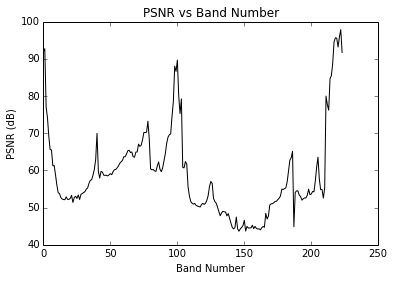

In [59]:
plt.figure(80)
plt.plot(range(224),psnr, 'k')
plt.xlabel('Band Number')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs Band Number')
plt.show()

In [60]:
print 'cr = ', cr
print 'bpp= ', bpp
print 'sdr= ', sdr
print 'psnr= ', psnr1
print 'dist= ',dist

cr =  25.2803837201
bpp=  0.632901785714
sdr=  55.1952335902
psnr=  58.8634161001
dist=  95.7045439538
